<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%EC%9D%98_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***드롭아웃의 이해***

드롭아웃은 무작위로 가중치를 삭제한다 > 이것이 왜 잘 작동할까?

가중치를 삭제해 기존 신경망보다 작은 신경망을 여러개 사용하는 것처럼보임

4개의 입력을 받아 출력을 주는 노드가 있다고 하자 이 노드에 드롭아웃을 적용하면 입력들이 랜덤으로 삭제되기에 특정 입력에 유난히 큰 가중치(오버피팅)을 부여하기가 꺼려짐

> 즉 4개의 입력에 가중치를 각각 분산시키는 편이 좋습니다.  
  분산 = 퍼짐, 편향 = 쏠림

분산함으로써 가중치의 노름의 제곱값이 줄어들게 됩니다.

> L2 정규화처럼 과대적합을 막는대 도움을 줌

> L2 정규화는 다른 가중치에 적용되고 서로 다른 크기의 입력에 잘 적응

우리는 드롭아웃을 할 때 keep_prob라는 하이퍼 피라미터를 설정해야하는데 이것은 각 층마다 정할 수 있다

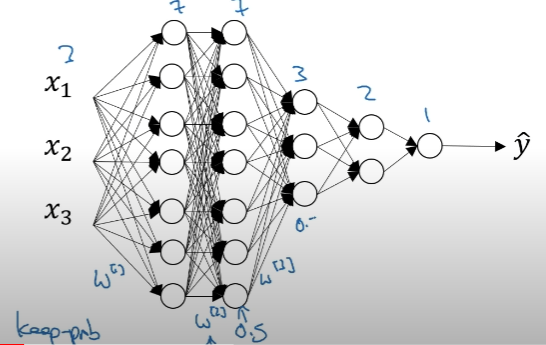

다음과 같은 이미지를 볼 때 L=2 는 즉 2층은 입력이 많아 가중치가 제일 많은 층 이 층같은 경우에는 keep_prob를 작게줘야함!
> 가중치 행렬 모양
1. (3, 7) 21
2. (7, 7) 49
3. (7, 3) 21
4. (3, 2) 6
5. (2, 1) 2

>2번째가 가장 많은 매개변수를 갖기에 가장 큰 가중치 행렬 이 부분에서 과대적합이 일어날 확률이 높음

> 이 부분의 특성에 의존할 확률이 높다는 의미


여기서는 0.5로 설정

> keep_prob = 노드를 유지할 확률

> L2 정규화에서 다른 층보다 더 많은 정규화가 필요한 계층에 매개변수 람다를 크게주는 것과 같은 의미

나머지 1층은 0.7

3층도 0.7

노드가 2개 1개 있는 마지막 두 층들은 과대적합 우려가 없다고 판다해 1을 줬습니다.


입력층에도 드롭아웃을 사용할 수 있지만 권장하지는 않는다.

입력층은 1.0 에서 그리고 가끔 0.9 값을 사용함

즉 과대적홥 위험도가 높은 층 

> 입력 데이터가 많아서 가중치들이 많이 존재하는 층에 드롭아웃을 강하게 적용

단점은 교차 검증을 위해 더 많은 하이퍼피라미터가 생긴다는 점

컴퓨터 비전에서는 아주 많은 픽셀 값을 모두 사용하기에 때문에 데이터가 부족함, 따라서 컴퓨터 비전은 드롭아웃을 자주 사용함

컴퓨터 비전은 데이터가 부족해서 과대적합이 자주 일어남




## 드롭아웃의 가장 큰 단점

> 비용함수 J가 더 이상 잘 정의되지 않는 현상이 발생

모든 반복마다 무작위로 한 뭉치의 노드들을 삭제하게 되면 모든 노드에서 정의된 비용함수 J가 하강하는지 확인하기가 어러워짐

> 디버깅하기가 어려워짐! 그래프가 잘 안 그려져서

##앤드류 교수님의 방법 

1. keep_prob를 1로 설정해서 드롭아웃을 멈추고 코드를 실행해서 j가 단조감소하는지 확인

2. 드롭아웃을 주고 j를 확인

- 드롭아웃은 랜덤으로 노드를 삭제 시키기 때문에, 하나의 특성에 의존 하지 못하게 만듦으로서 가중치를 다른 곳으로 분산 시키는 효과가 있습니다.

- 드롭아웃의 keep.prop 확률은 층마다 다르게 설정 할 수 있습니다.

- 모든 반복에서 잘 정의된 비용함수가 하강하는지 확인하는게 어려워집니다.  > 확인 되면 드롭아웃을 써서 확인은 못하지만 잘 진행된다는 의미

- 따라서 우선 드롭아웃을 사용하지 않고, 비용함수가 단조감소인지 확인 후에 사용해야 합니다.